In [373]:
from random import randint
from math import exp
import numpy as np
import networkx as nx

# Задачи

1. Переписать под 3 подаваемых значения, а не под список

In [374]:
learning_rate = 0.1
epoch = 200

imput_values = np.array([[1, 1, 1], [0, 1, 1], [1, 0, 1], [0, 0, 1], ], dtype=float)
out_expected_values = np.array([0, 1, 1, 0], dtype=float)


neuron_hidden_layer_1 = np.array([0,0,0], dtype=float)
neuron_hidden_layer_2 = np.array([0,0], dtype=float)
out_actual_values = np.array([0], dtype=float)

# ошибка на нейроне от двух нейронов на втором слое к трем на первом слое [2][3]
neuron_hidden_layer_error_1 = np.array([
    [0,0,0],
    [0,0,0]
    ], dtype=float)

# ошибка на нейроне от поckеднего нейрона к двум на втором слое [1][2]
neuron_hidden_layer_error_2 = np.array([0,0], dtype=float)

# веса к трем от трех [3][3]
weights_1 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к двум от трех [2][3]
weights_2 = np.array([
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000],
    [randint(0,1000)/1000, randint(0,1000)/1000, randint(0,1000)/1000]
    ], dtype=float)

# веса к одному от двух [1][2]
weights_3 = np.array([randint(0,1000)/1000, randint(0,1000)/1000], dtype=float)

In [375]:
weights_1

array([[0.297, 0.915, 0.253],
       [0.903, 0.6  , 0.424],
       [0.06 , 0.142, 0.21 ]])

In [376]:
def sigmoid(x):
    return 1 / (1 + exp(-x))

In [377]:
def activation_value(imput_values, weights, output_walues):

    for i_neuron in imput_values:
        for i in range(len(output_walues)):
            output_walues[i] = sigmoid(np.sum(i_neuron * weights[i]))

    return output_walues

In [378]:
def running(
    imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
    weights_1, weights_2, weights_3):
    
    neuron_hidden_layer_1 = activation_value(imput_values, weights_1, neuron_hidden_layer_1)
    neuron_hidden_layer_2 = activation_value(neuron_hidden_layer_1, weights_2, neuron_hidden_layer_2)
    out_actual_values = activation_value(neuron_hidden_layer_2, weights_3, out_actual_values)

    return neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values

In [379]:
neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
    imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
    weights_1, weights_2, weights_3)

In [380]:
def calculation_delta(value, error):
    weights_delta = error * sigmoid(value) * (1-sigmoid(value))
    return weights_delta

In [381]:
def correct_weight(weight, value, delta, learning_rate):
    return weight - value * delta * learning_rate

In [382]:
def backpropagation_error(
    out_actual_values, out_expected_values,
    neuron_hidden_layer_2, neuron_hidden_layer_1, imput_values,
    weights_3, weights_2, weights_1,
    neuron_hidden_layer_error_2, neuron_hidden_layer_error_1,
    learning_rate = 0.3
    ):
    '''
    Функция обратного распределения ошибки
    '''
    # вычисляем ошибку на последнем нейроне
    first_error = out_actual_values[0] - out_expected_values

    # скорректируем третьи веса и посчитаем ошибку для каждого значения на втором скрытом слое
    for i in range(len(neuron_hidden_layer_2)):
        delta = calculation_delta(neuron_hidden_layer_2[i], first_error)
        weights_3[i] = correct_weight(weights_3[i], neuron_hidden_layer_2[i], delta, learning_rate)
        neuron_hidden_layer_error_2[i] = weights_3[i] * delta

    # скорректируем вторые веса и посчитаем ошибку для каждого значения на первом скрытом слое от второго скрытого слоя
    for i in range(len(neuron_hidden_layer_2)):
        for j in range(len(neuron_hidden_layer_1)):
            delta = calculation_delta(neuron_hidden_layer_1[j], neuron_hidden_layer_error_2[i])
            weights_2[i][j] = correct_weight(weights_2[i][j], neuron_hidden_layer_1[j], delta, learning_rate)
            neuron_hidden_layer_error_1[i][j] = weights_2[i][j] * delta
    
    # скорректируем первые веса
    for i in range(len(neuron_hidden_layer_error_1)):
        for j in range(len(neuron_hidden_layer_1)):
            for k in range(len(imput_values)):
                delta = calculation_delta(imput_values[k], neuron_hidden_layer_error_1[i][j])
                weights_1[j][k] = correct_weight(weights_1[j][k], imput_values[k], delta, learning_rate)
    
    return weights_1, weights_2, weights_2

In [383]:
def train(
    imput_values, out_actual_values, out_expected_values,
    neuron_hidden_layer_1, neuron_hidden_layer_2,
    weights_1, weights_2, weights_3,
    neuron_hidden_layer_error_1, neuron_hidden_layer_error_2,
    epoch, learning_rate):
    
    while epoch != 0:
        neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
            imput_values, neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
            weights_1, weights_2, weights_3
            )
        
        weights_1, weights_2, weights_2 = backpropagation_error(
            out_actual_values, out_expected_values,
            neuron_hidden_layer_2, neuron_hidden_layer_1, imput_values,
            weights_3, weights_2, weights_1,
            neuron_hidden_layer_error_2, neuron_hidden_layer_error_1,
            learning_rate
            )
    
        epoch -=1

    return weights_1, weights_2, weights_2

In [384]:
for i in range(len(imput_values)):
    weights_1, weights_2, weights_2 = train(
        imput_values[i], out_actual_values, out_expected_values[i],
        neuron_hidden_layer_1, neuron_hidden_layer_2,
        weights_1, weights_2, weights_3,
        neuron_hidden_layer_error_1, neuron_hidden_layer_error_2,
        epoch, learning_rate)

In [393]:
imput_num = 1

In [394]:
neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values = running(
            imput_values[imput_num], neuron_hidden_layer_1, neuron_hidden_layer_2, out_actual_values,
            weights_1, weights_2, weights_3
            )

In [395]:
print('_'*len(str(imput_values[imput_num])))
print(imput_values[imput_num])
print('^'*len(str(imput_values[imput_num])))

print(weights_1)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_1)))
print(neuron_hidden_layer_1)
print('^'*len(str(neuron_hidden_layer_1)))

print(weights_2)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(neuron_hidden_layer_2)))
print(neuron_hidden_layer_2)
print('^'*len(str(neuron_hidden_layer_2)))

print(weights_3)

print()
print('   | ')
print('   ▼ ')

print('_'*len(str(out_actual_values)))
print(out_actual_values)
print('^'*len(str(out_actual_values)))

__________
[0. 1. 1.]
^^^^^^^^^^
[[0.35657016 0.92127168 0.25169988]
 [1.03383764 0.61307387 0.42483455]
 [0.1551155  0.15471297 0.2077623 ]]

   | 
   ▼ 
__________________________________
[0.82193925 0.88812656 0.62658424]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[[0.03205913 0.68686403 0.24481333]
 [0.16381652 0.26923111 0.35628403]]

   | 
   ▼ 
_______________________
[0.64653939 0.62118542]
^^^^^^^^^^^^^^^^^^^^^^^
[-0.31768737  0.34680091]

   | 
   ▼ 
___________
[0.4508238]
^^^^^^^^^^^


{('In_0', 'H_1.0'): Text(0.6, 0.0, '0.35657016411033216'),
 ('In_1', 'H_1.0'): Text(0.6, -0.4, '0.9212716815873064'),
 ('In_2', 'H_1.0'): Text(0.6, -0.8, '0.2516998848457588'),
 ('In_0', 'H_1.1'): Text(0.6, -0.6, '1.0338376442563997'),
 ('In_1', 'H_1.1'): Text(0.6, -1.0, '0.613073867865052'),
 ('In_2', 'H_1.1'): Text(0.6, -1.4, '0.4248345462738086'),
 ('In_0', 'H_1.2'): Text(0.6, -1.2, '0.15511550076078326'),
 ('In_1', 'H_1.2'): Text(0.6, -1.6, '0.15471297178806345'),
 ('In_2', 'H_1.2'): Text(0.6, -2.0, '0.20776230396380993'),
 ('H_1.0', 'H_2.0'): Text(1.6, -0.3, '0.0320591251083811'),
 ('H_1.1', 'H_2.0'): Text(1.6, -0.7, '0.6868640266741551'),
 ('H_1.2', 'H_2.0'): Text(1.6, -1.1, '0.24481332652424842'),
 ('H_1.0', 'H_2.1'): Text(1.6, -0.8999999999999999, '0.16381652308465383'),
 ('H_1.1', 'H_2.1'): Text(1.6, -1.2999999999999998, '0.2692311052665792'),
 ('H_1.2', 'H_2.1'): Text(1.6, -1.7, '0.3562840256126972'),
 ('H_2.0', 'Out_0'): Text(2.5999999999999996, -0.8, '-0.31768736799297104')

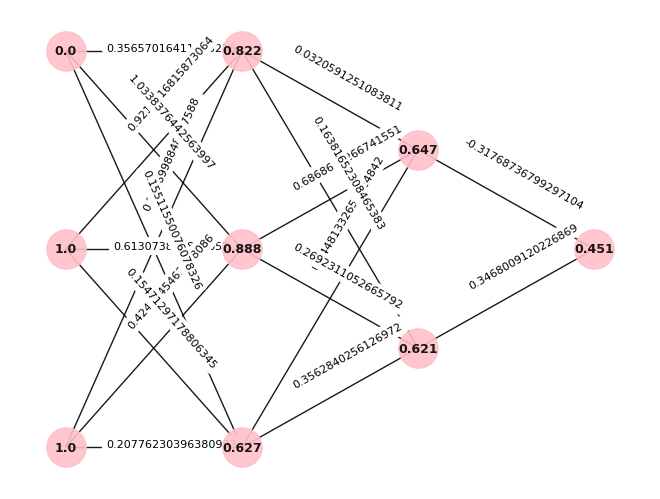

In [396]:
nodes = []
positions = {}
nodes_labels = {}
for i in range(len(imput_values[imput_num])):
    node = 'In_'+str(i)
    nodes.append(node)
    positions[node] = [0, -i]
    nodes_labels[node]= round(imput_values[imput_num][i],3)
for i in range(len(neuron_hidden_layer_1)):
    node = 'H_1.'+str(i)
    nodes.append(node)
    positions[node] = [1, -i]
    nodes_labels[node]= round(neuron_hidden_layer_1[i],3)
for i in range(len(neuron_hidden_layer_2)):
    node = 'H_2.'+str(i)
    nodes.append(node)
    positions[node] = [2, -i-0.5]
    nodes_labels[node]= round(neuron_hidden_layer_2[i],3)
for i in range(len(out_actual_values)):
    node = 'Out_'+str(i)
    nodes.append(node)
    positions[node] = [3, -1]
    nodes_labels[node]= round(out_actual_values[i],3)

edges = []
edges_labels = {}
for i in range(len(neuron_hidden_layer_1)):
    for j in range(len(imput_values[imput_num])):
        edge_value = ('In_'+str(j), 'H_1.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_1[i][j]
for i in range(len(neuron_hidden_layer_2)):
    for j in range(len(neuron_hidden_layer_1)):
        edge_value = ('H_1.'+str(j), 'H_2.'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_2[i][j]
for i in range(len(out_actual_values)):
    for j in range(len(neuron_hidden_layer_2)):
        edge_value = ('H_2.'+str(j), 'Out_'+str(i))
        edges.append(edge_value)
        edges_labels[edge_value] = weights_3[j]

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(
    G, pos=positions, edge_color='black', linewidths=1,
    node_size=800, node_color='pink', alpha=0.9,
    labels=nodes_labels, font_size=9, font_weight = 'bold'
)

nx.draw_networkx_edge_labels(
    G, pos=positions,
    edge_labels=edges_labels,
    verticalalignment='baseline',
    label_pos=0.4, font_size=8)